# EDA

In [25]:
%matplotlib inline
import seaborn as sns ; sns.set_style("white") ;
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TypeError: set_style() got an unexpected keyword argument 'palette'

In [26]:
ratings = pd.read_csv("ratings.csv", header = None)
gender = pd.read_csv("gender.csv", header = None)

In [3]:
gender.columns = ['user', 'gender']
ratings.columns = ['user1', 'user2', "score"]

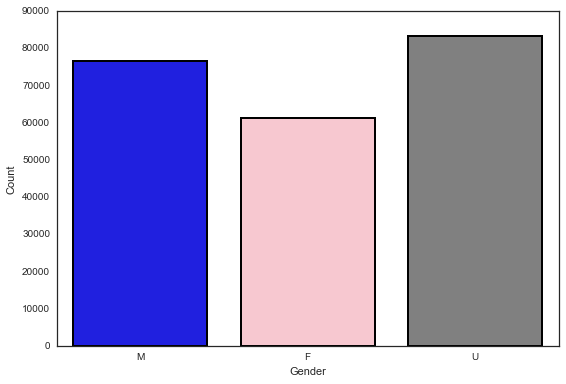

In [4]:
color_map = {'F' : 'pink', 
             'M' : 'blue', 
             'U' : 'grey'}

plt.figure(figsize=(9, 6))

g_plot = sns.countplot(data = gender, 
                       x = 'gender', 
                       order = ['M','F','U'], 
                       palette = color_map, 
                       linewidth=2,
                       edgecolor ="black")

g_plot.set_ylabel('Count')
g_plot.set_xlabel('Gender')

#plt.savefig("full_gender.pdf")



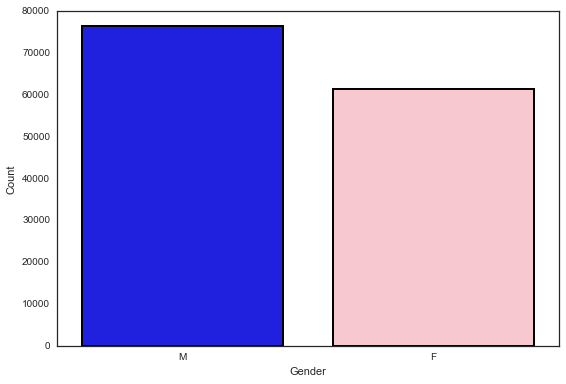

In [5]:

plt.figure(figsize=(9, 6))

g_plot = sns.countplot(data = gender, 
                       x = 'gender', 
                       order = ['M','F'], 
                       palette = color_map, 
                       linewidth=2,
                       edgecolor ="black")

g_plot.set_ylabel('Count')
g_plot.set_xlabel('Gender')

#plt.savefig("gender_no_unkowns.pdf")




In [6]:
full = pd.merge(ratings, gender, how='left', on=None, left_on='user1', right_on='user')
full2 =  pd.merge(full, gender, how='left', on=None, left_on='user2', right_on='user')
result = full2[['user1','user2','gender_x','gender_y','score']]

In [7]:
means = result[['gender_x', 'score']].groupby('gender_x').mean()
means

,score
gender_x,
F,6.358190
M,5.031327
U,5.860144


In [8]:
Males_Males = result.loc[((result['gender_x'] == 'M') & (result['gender_y'] == 'M')),:]
Males_Female =  result.loc[((result['gender_x'] == 'M') & (result['gender_y'] == 'F')),:]

Female_Male = result.loc[((result['gender_x'] == 'F') & (result['gender_y'] == 'M')),:]
Female_Female = result.loc[((result['gender_x'] == 'F') & (result['gender_y'] == 'F')),:]

In [9]:
male_male_mean = Males_Males[['gender_x', 'score']].groupby('gender_x').mean()
male_fem_mean = Males_Female[['gender_x', 'score']].groupby('gender_x').mean()
fem_male_mean = Female_Male[['gender_x', 'score']].groupby('gender_x').mean()
fem_fem_mean = Female_Female[['gender_x', 'score']].groupby('gender_x').mean()

mmsd = Males_Males[['gender_x', 'score']].groupby('gender_x').std()
mfsd = Males_Female[['gender_x', 'score']].groupby('gender_x').std()
fmsd = Female_Male[['gender_x', 'score']].groupby('gender_x').std()
ffsd = Female_Female[['gender_x', 'score']].groupby('gender_x').std()


print "Male rating males:", male_male_mean.ix[0,0]
print "Male rating Female:", male_fem_mean.ix[0,0]

print "Female rating males:", fem_male_mean.ix[0,0]
print "Female rating Females:", fem_fem_mean.ix[0,0]


Male rating males: 4.46144336541
Male rating Female: 5.48394431546
Female rating males: 6.92284280661
Female rating Females: 5.13514019894


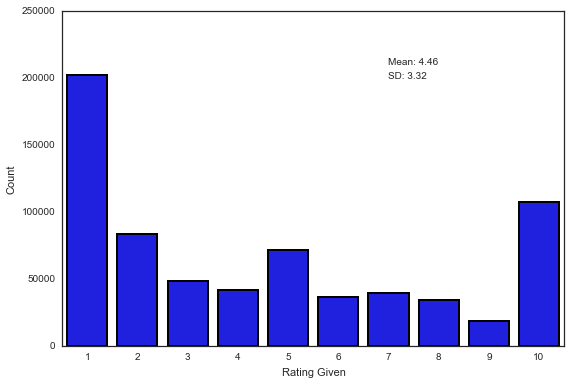

In [39]:
plt.figure(figsize=(9, 6))

m_2_m = sns.countplot(data = Males_Males, 
                       x = 'score', 
                       linewidth=2,
                       order = np.arange(1,11,1),
                       color = "blue",
                       edgecolor ="black")


m_2_m.set_ylabel('Count')
m_2_m.set_xlabel('Rating Given')

m_2_m.annotate('Mean: %2.2f ' %(male_male_mean.ix[0,0]), xy=(4, 62222), xytext=(6, 210000))
m_2_m.annotate('SD: %2.2f ' %(mmsd.ix[0,0]), xy=(5, 6), xytext=(6, 200000))
#m_2_m.set(yticks=[])    

plt.savefig("males_to_males.pdf")

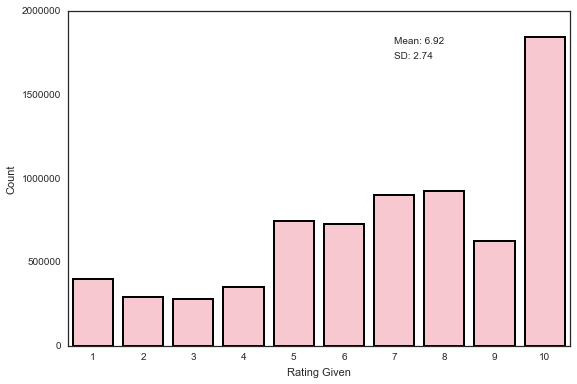

In [40]:
plt.figure(figsize=(9, 6))


f_2_m = sns.countplot(data = Female_Male, 
                       x = 'score', 
                       linewidth=2,
                       order = np.arange(1,11,1),
                       color = "pink",
                       edgecolor ="black")

f_2_m.set_ylabel('Count')
f_2_m.set_xlabel('Rating Given')


f_2_m.annotate('Mean: %2.2f ' %(fem_male_mean.ix[0,0]), xy=(4, 62222), xytext=(6, 1805000))
f_2_m.annotate('SD: %2.2f ' %(fmsd.ix[0,0]), xy=(5, 6), xytext=(6, 1720000))
#f_2_m.set(yticks=[])

plt.savefig("female_to_males.pdf")

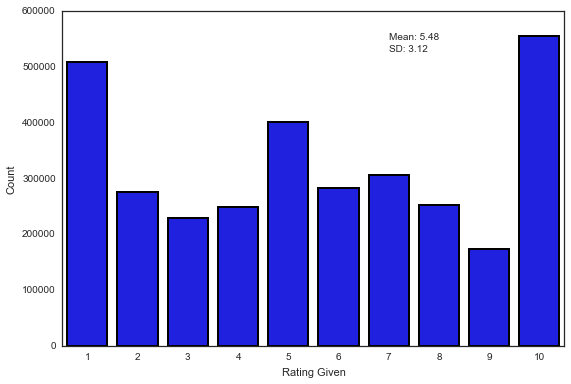

In [41]:
plt.figure(figsize=(9, 6))

m_2_f = sns.countplot(data = Males_Female, 
                       x = 'score', 
                       linewidth=2,
                       order = np.arange(1,11,1),
                       color = "blue",
                       edgecolor ="black")

m_2_f.set_ylabel('Count')
m_2_f.set_xlabel('Rating Given')
m_2_f.annotate('Mean: %2.2f ' %(male_fem_mean.ix[0,0]), xy=(4, 62222), xytext=(6, 550000))
m_2_f.annotate('SD: %2.2f ' %(mfsd.ix[0,0]), xy=(5, 6), xytext=(6, 528000))

plt.savefig("male_to_female.pdf")
#m_2_f.set(yticks=[])    
    

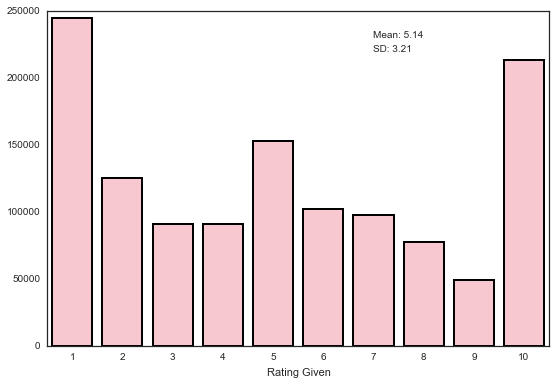

In [42]:
plt.figure(figsize=(9, 6))

f_2_f = sns.countplot(data = Female_Female, 
                       x = 'score', 
                       linewidth=2,
                       order = np.arange(1,11,1),
                       color = "pink",
                       edgecolor ="black")


f_2_f.set_ylabel('  ')
f_2_f.set_xlabel('Rating Given')

f_2_f.annotate('Mean: %2.2f ' %(fem_fem_mean.ix[0,0]), xy=(5, 6), xytext=(6, 230000))
f_2_f.annotate('SD: %2.2f ' %(ffsd.ix[0,0]), xy=(5, 6), xytext=(6, 220000))
#f_2_f.set(yticks=[])
plt.savefig("female_to_female.pdf")

